# HRV Parameter Extraction
This notebook is used for extracting HRV parameters from the peaks extracted in step 3.

To do:
- Calculate R-R intervals (done?)
- Plot Frequency domain for HRV values
- Extract SDNN
- Extract pNN50
- Save these values in the folder associated with the patient

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import pyarrow.feather as feather
from tqdm import tqdm

In [2]:
%run "4.0-HRV_Extraction_Function.ipynb"

In [3]:
root = 'G:\My Drive\Molecool\Databases\Database1'

## Initial Testing on selected snippets

In [4]:
### Some good snippets... ###
patients = []
snippets = []
snippets.append('G:\My Drive\Molecool\Databases\Database1\S0288\holter\Snippet000')
snippets.append('G:\My Drive\Molecool\Databases\Database1\S0288\holter\Snippet001')
snippets.append('G:\My Drive\Molecool\Databases\Database1\S0288\holter\Snippet002')

snippets.append('G:\My Drive\Molecool\Databases\Database1\S0300\holter\Snippet000')
snippets.append('G:\My Drive\Molecool\Databases\Database1\S0300\holter\Snippet001')
snippets.append('G:\My Drive\Molecool\Databases\Database1\S0300\holter\Snippet002')

snippets.append('G:\My Drive\Molecool\Databases\Database1\S0310\holter\Snippet000')
snippets.append('G:\My Drive\Molecool\Databases\Database1\S0310\holter\Snippet001')
snippets.append('G:\My Drive\Molecool\Databases\Database1\S0310\holter\Snippet002')
snippets.append('G:\My Drive\Molecool\Databases\Database1\S0310\holter\Snippet003')
snippets.append('G:\My Drive\Molecool\Databases\Database1\S0310\holter\Snippet004')

SDNN values for Snippet000 in patient S0288 3.39934634239519
SDNN values for Snippet001 in patient S0288 80.99872460989587
SDNN values for Snippet002 in patient S0288 5.609908589287823
SDNN values for Snippet000 in patient S0300 19.20268355088829
SDNN values for Snippet001 in patient S0300 51.13233375815693
SDNN values for Snippet002 in patient S0300 8.020806277010642
SDNN values for Snippet000 in patient S0310 117.84762147605055
SDNN values for Snippet001 in patient S0310 9.688731506307693
SDNN values for Snippet002 in patient S0310 28.128283350624024
SDNN values for Snippet003 in patient S0310 19.9434002427657
SDNN values for Snippet004 in patient S0310 17.942903032449387


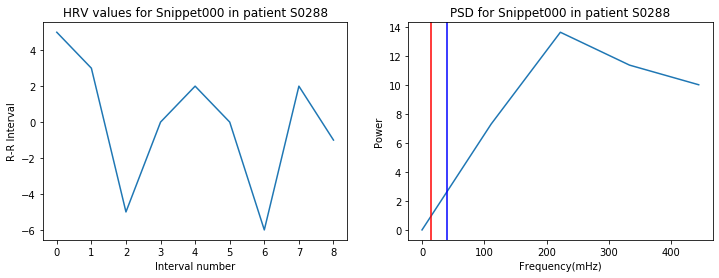

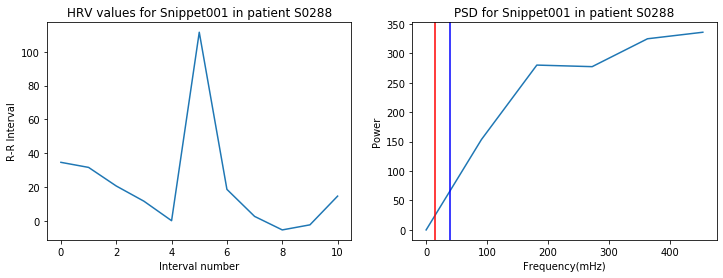

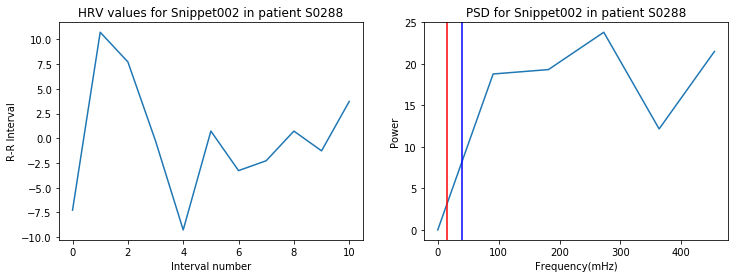

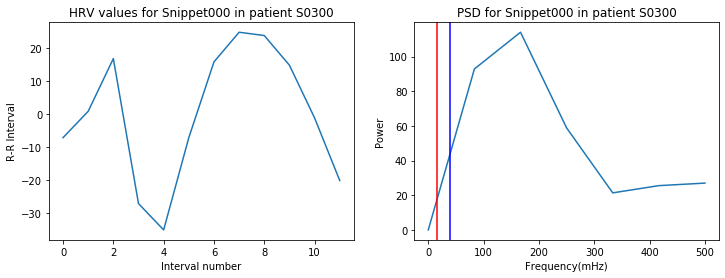

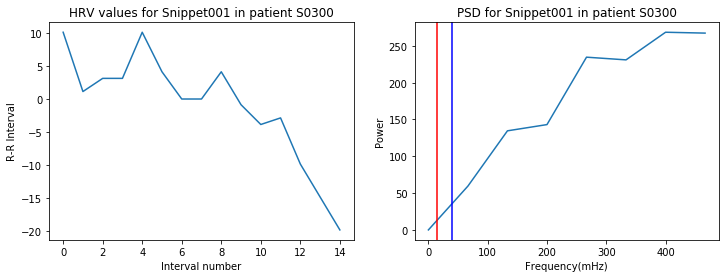

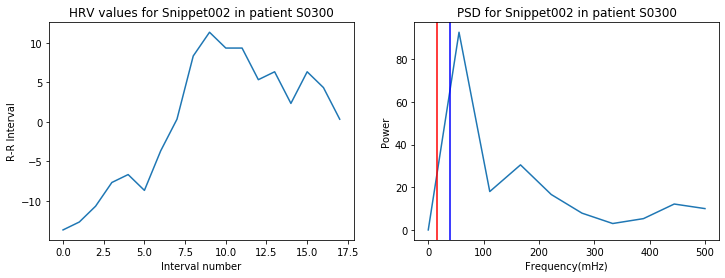

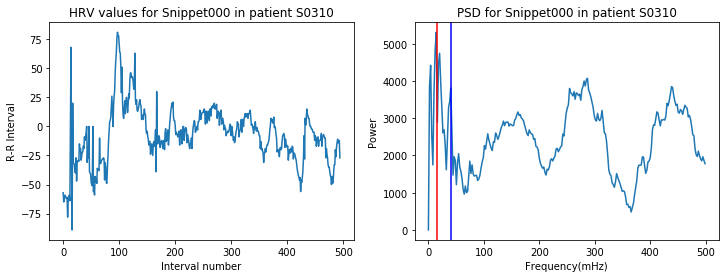

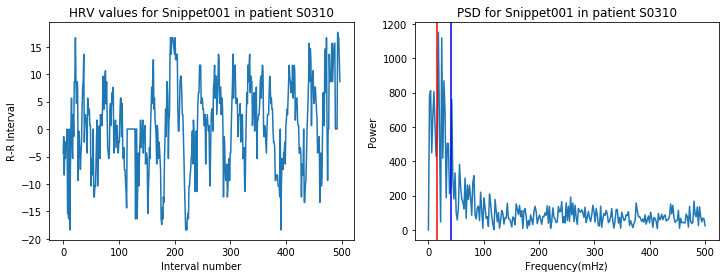

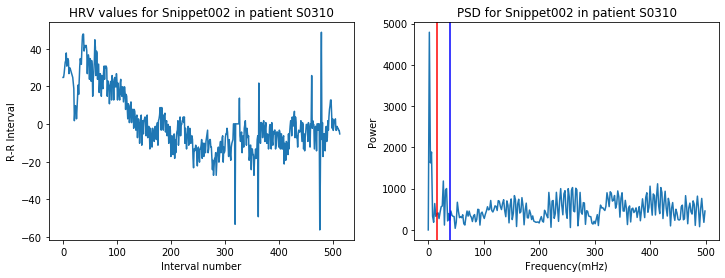

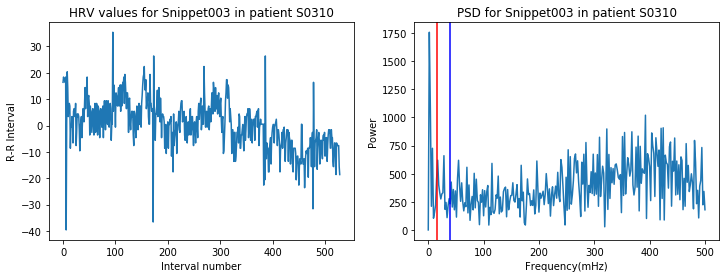

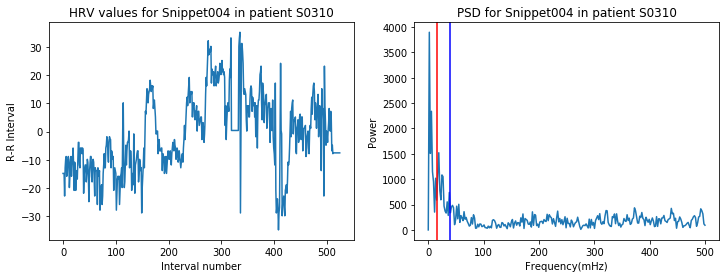

In [5]:
### 
for peaks in snippets:
    df = pd.read_feather(peaks + '\\PEAKS.ftr')
    
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    df_HRV = _hrvreading(df['x_values'])
    plt.title('HRV values for '  + peaks[-10:] + ' in patient ' + peaks[-23:-18])
    
    print('SDNN values for '  + peaks[-10:] + ' in patient ' + peaks[-23:-18] + ' ' + str(_SDNN(df_HRV)))
    
    plt.subplot(1,2,2)
    _fft(df_HRV, 1000)
    plt.title('PSD for '  + peaks[-10:] + ' in patient ' + peaks[-23:-18])
    

In [6]:
for peaks in snippets:
    df_test = pd.read_feather(peaks + '\\PEAKS.ftr')
    print(df_test)

   x_values     y_values
0       192   495.578512
1      1183   410.224014
2      2172   615.170520
3      3153   910.180344
4      4139   491.386500
5      5127   519.246603
6      6113  1024.000000
7      7093   666.080610
8      8081   546.390019
9      9066   234.352253
    x_values     y_values
0        570    50.012481
1       1393    73.869271
2       2213    69.674041
3       3022   398.091581
4       3822   242.465378
5       4373  1024.000000
6       5273   600.568254
7       6080    35.330866
8       6871   225.776338
9       7654   465.234930
10      8440   101.811206
11      9243    20.719558
    x_values     y_values
0        266   223.922704
1       1079   252.988043
2       1910   282.724703
3       2738   267.868138
4       3558   469.916916
5       4369   123.921559
6       5190   308.773018
7       6007  1024.000000
8       6825   190.350325
9       7646   207.745326
10      8465   612.457208
11      9289   261.318616
    x_values     y_values
0        267    10.8850